<a href="https://colab.research.google.com/github/emadeldinadel2022/EmotionRecognitionText/blob/main/emotion_recognition_with_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 9.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx

In [ ]:
#reading and combine datasets
ds1 = pd.read_csv('/content/sample_data/tweet_emotions.csv')

In [ ]:
ds1

In [ ]:
ds1.sentiment.value_counts()

In [ ]:
ds2 = pd.read_csv('/content/sample_data/raw_csv.txt')

In [ ]:
ds2

In [ ]:
ds2.Emotion.value_counts()

In [ ]:
ds3 = pd.read_csv('/content/sample_data/raw1.txt')
ds4 = pd.read_csv('/content/sample_data/raw2.txt')
ds5 = pd.read_csv('/content/sample_data/raw3.txt')

In [ ]:
ds3 = ds3['text'].str.split(';', 1, expand = True)

In [ ]:
ds3[1].value_counts()

In [ ]:
ds4 = ds4['text'].str.split(';', 1, expand = True)
ds5 = ds5['text'].str.split(';', 1, expand = True)

In [ ]:
ds4[1].value_counts()

In [ ]:
ds5[1].value_counts()

In [ ]:
ds2.isna().sum()

In [ ]:
ds2['Clean_Text'].fillna(ds2['Text'], inplace = True)

In [ ]:
ds2.isna().sum()

In [ ]:
unclean_text = ds2['Text']
ds2 = ds2.drop('Text', axis = 1)

In [ ]:
ds2 = ds2.drop('Unnamed: 0', axis = 1)

In [ ]:
ds2

In [ ]:
unclean_text

In [ ]:
ds2.rename({'Clean_Text' : 'Text'}, axis = 1, inplace = True)

In [ ]:
ds2

In [ ]:
ds1.rename({'sentiment' : 'Emotion', 'content' : 'Text'}, axis = 1, inplace = True)

In [ ]:
tweet_id = ds1['tweet_id']
ds1 = ds1.drop('tweet_id', axis = 1)

In [ ]:
ds1

In [ ]:
dsc = pd.concat([ds3, ds4, ds5], axis = 0)

In [ ]:
dsc.rename({0 : 'Text',1 : 'Emotion'}, axis = 1, inplace = True)

In [ ]:
dsc

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [ ]:
dataset = pd.concat([ds1, ds2, dsc], axis = 0)

In [ ]:
dataset.to_pickle('dataset.pickle')

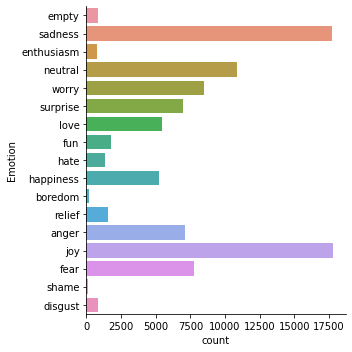

In [ ]:
sns.catplot(data=dataset, y="Emotion", kind = "count")

In [ ]:
dataset = pd.read_pickle('/content/sample_data/dataset.pickle')

In [ ]:
dataset

In [ ]:
dataset.shape

(94792, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94792 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  94792 non-null  object
 1   Text     94792 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


In [ ]:
dataset.isna().sum()

Emotion    0
Text       0
dtype: int64

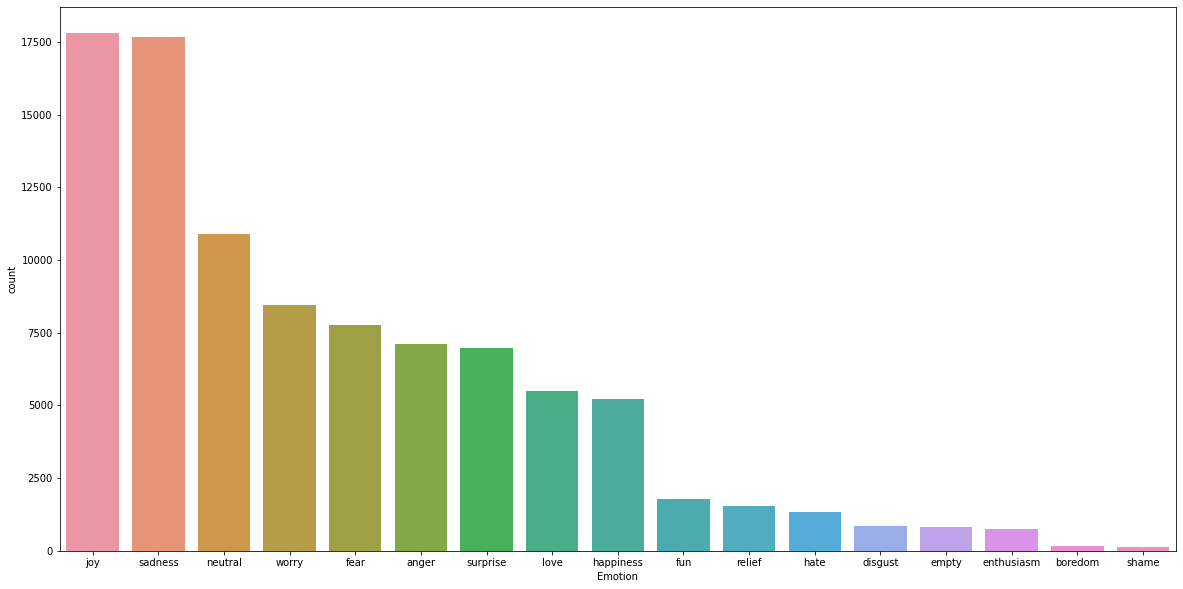

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Emotion', data = dataset, order = dataset.Emotion.value_counts().index)
plt.show()

In [ ]:
empty = dataset[dataset['Emotion'] == 'empty']

In [ ]:
empty

,Emotion,Text,Sentiment
0,empty,@tiffanylue i know i was listenin to bad habi...,Negative
44,empty,@creyes middle school and elem. High schools w...,Negative
52,empty,@djmicdamn hey yu lil fucker i textd yu,Neutral
141,empty,@softtouchme just answered you- never learned ...,Neutral
180,empty,Have a headache I'm going to bed. Goodnight!,Neutral
...,...,...,...
39702,empty,"Here we go again, back to work. Happy Mothers ...",Positive
39742,empty,@PhilippaJane the &quot;no pants&quot; idea co...,Positive
39749,empty,@sloanyxxx Thanks,Positive
39845,empty,@xxxRobyn Yeah *fingers crossed*,Neutral


In [ ]:
plt.savefig('barplotemotions.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    result = 'Positive'
  elif sentiment < 0:
    result = 'Negative'
  else:
    result = 'Neutral'
  return result

In [ ]:
get_sentiment('you are so bad')

'Negative'

In [ ]:
dataset['Sentiment'] = dataset['Text'].apply(get_sentiment)

In [ ]:
dataset

In [ ]:
dataset.Sentiment.value_counts()

Positive    39280
Neutral     31874
Negative    23638
Name: Sentiment, dtype: int64

In [ ]:
dataset.groupby(['Emotion', 'Sentiment']).size()

Emotion     Sentiment
anger       Negative      3080
            Neutral       2340
            Positive      1696
boredom     Negative        80
            Neutral         56
            Positive        43
disgust     Negative       331
            Neutral        303
            Positive       222
empty       Negative       168
            Neutral        418
            Positive       241
enthusiasm  Negative       100
            Neutral        254
            Positive       405
fear        Negative      2916
            Neutral       2731
            Positive      2136
fun         Negative       205
            Neutral        474
            Positive      1097
happiness   Negative       345
            Neutral       1224
            Positive      3640
hate        Negative       694
            Neutral        364
            Positive       265
joy         Negative      2377
            Neutral       5174
            Positive     10255
love        Negative       532
            Neutr

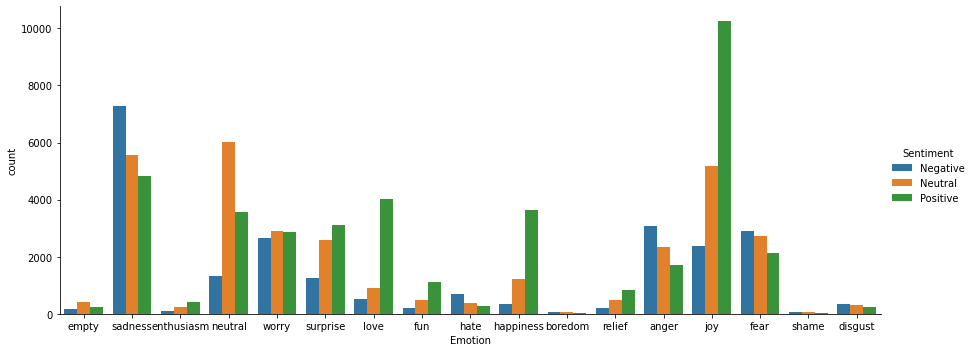

In [ ]:
sns.catplot(x = 'Emotion', hue = 'Sentiment', data = dataset, kind = 'count', aspect = 2.5)

In [ ]:
#cleaning texts from noise words
dataset['Clean_Text'] = dataset['Text'].apply(nfx.remove_stopwords)
dataset['Clean_Text'] = dataset['Text'].apply(nfx.remove_punctuations)
dataset['Clean_Text'] = dataset['Text'].apply(nfx.remove_userhandles)

In [ ]:
dataset.head()

In [ ]:
dataset.isna().sum()

Emotion       0
Text          0
Sentiment     0
Clean_Text    0
dtype: int64

In [ ]:
#extract most common words in text
from collections import Counter
def most_common_words(text, num = 50):
  tokens = [token for token in text.split()]
  mct = Counter(tokens).most_common(num)
  return dict(mct)

In [ ]:
emo_list = dataset.Emotion.unique().tolist()

In [ ]:
emo_list

In [ ]:
def dic_mct(emotion):
  emo_list = dataset[dataset['Emotion'] == emotion]['Clean_Text'].tolist()
  docx = ' '.join(emo_list)
  keywords = most_common_words(docx)
  return keywords

In [ ]:
emo_mct = {}
for emo in emo_list:
  emo_mct[emo] = dic_mct(emo)

In [ ]:
def plot_most_common(emo_dic, emotion_name):
  df = pd.DataFrame(emo_dic.items(), columns = ['token', 'count'])
  plt.figure(figsize = (20, 10))
  plt.title(f'plot of tokens in emotion {emotion_name}')
  sns.barplot(x = 'token', y = 'count', data = df)
  plt.xticks(rotation = 45)
  plt.show()

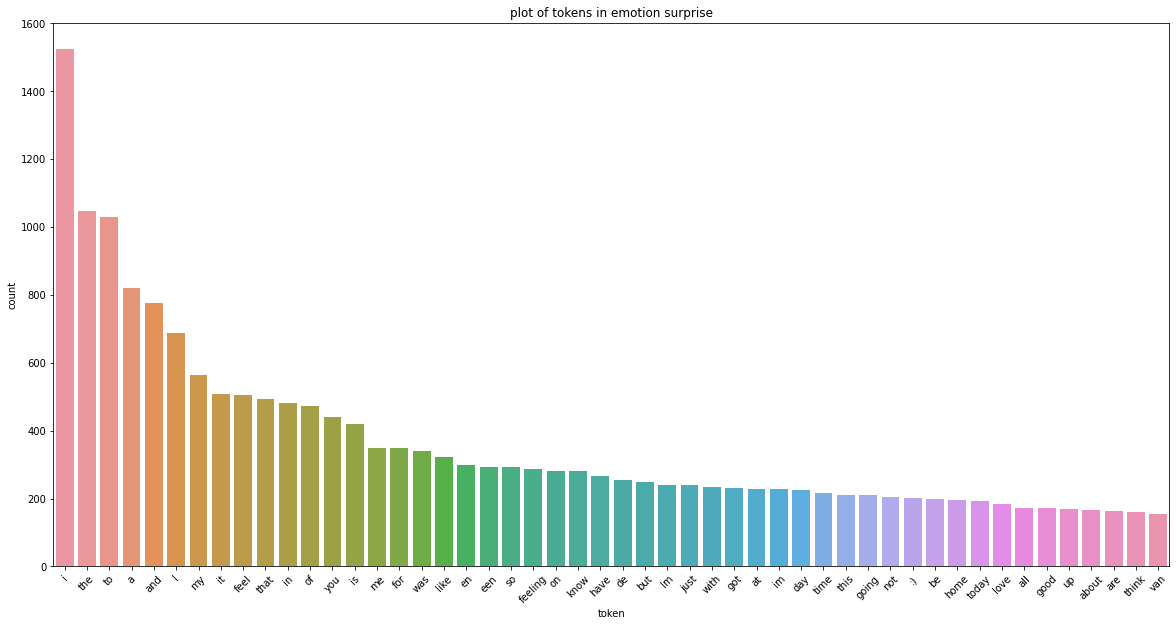

In [ ]:
plot_most_common(emo_mct['surprise'], 'surprise')

In [ ]:
from wordcloud import WordCloud

In [ ]:
def docx_emo(emotion):
  emo_list = dataset[dataset['Emotion'] == emotion]['Clean_Text'].tolist()
  return ' '.join(emo_list)
  

In [ ]:
def plot_wordcloud(docx, emotion_name):
  word_cloud = WordCloud().generate(docx)
  plt.figure(figsize = (20,10))
  plt.title(f'plot of tokens in emotion {emotion_name}')
  plt.imshow(word_cloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

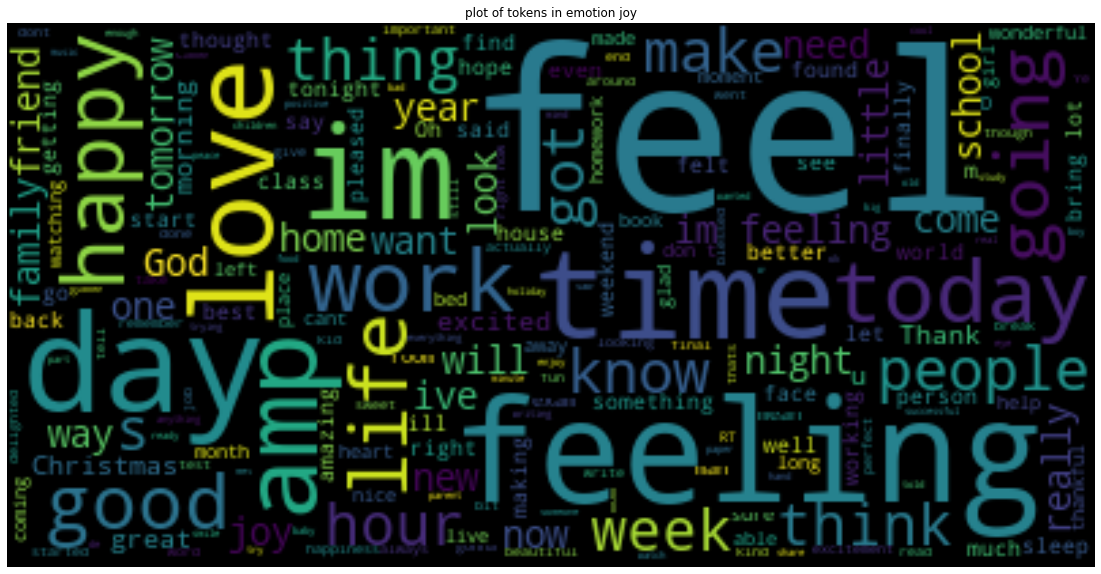

In [ ]:
plot_wordcloud(docx_emo('joy'), 'joy')

In [ ]:
#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.model_selection import train_test_split

In [ ]:
dataset.shape

(94792, 4)

In [ ]:
mask = dataset[dataset['Emotion'] == 'empty']
dataset.drop(mask.index, inplace = True)

In [ ]:
dataset.shape

(92788, 4)

In [ ]:
dataset.Emotion.value_counts()

joy           17411
sadness       17408
neutral       10843
worry          8459
fear           7634
anger          6960
surprise       6858
love           5457
happiness      5209
fun            1776
relief         1526
hate           1323
disgust         844
enthusiasm      759
boredom         179
shame           142
Name: Emotion, dtype: int64

In [ ]:
X = dataset['Clean_Text']
y = dataset['Emotion']

In [ ]:
cv = CountVectorizer()
Xfeatures = cv.fit_transform(X)
name = cv.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xfeatures, y, train_size = 0.7, random_state = 123)

In [ ]:
#model naive bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_model.score(X_test, y_test)

0.42870999030067897

In [ ]:
y_pred_nb = nb_model.predict(X_test)

In [ ]:
y_pred_nb

array(['sadness', 'sadness', 'joy', ..., 'anger', 'joy', 'worry'],
      dtype='<U10')

In [ ]:
#single pred
text = ['i love ahemd otifi']
vect = cv.transform(text).toarray()
nb_model.predict(vect)

array(['joy'], dtype='<U10')

In [ ]:
nb_model.predict_proba(vect)

array([[3.22114778e-02, 5.31343120e-05, 1.44232725e-03, 7.45922439e-04,
        1.45275848e-01, 4.47708038e-03, 3.51387171e-02, 1.10527015e-03,
        2.91012881e-01, 1.93464239e-01, 4.37298570e-02, 4.01384653e-03,
        1.45894275e-01, 1.45469345e-05, 5.96998624e-02, 4.17207151e-02]])

In [ ]:
def predict_emotion(text, model):
  vec = vect = cv.transform(text).toarray()
  pred = model.predict(vect)
  arrpred = model.predict_proba(vect)
  predpercentage = dict(zip(model.classes_, arrpred[0]))
  print(f"Prediction emotion : {pred[0]}, Prediction score : {np.max(arrpred)}") 
  return predpercentage 

In [ ]:
predict_emotion(text, nb_model)

Prediction emotion : joy, Prediction score : 0.2910128805639154


{'anger': 0.032211477818369694,
 'boredom': 5.3134312031097144e-05,
 'disgust': 0.0014423272537215648,
 'enthusiasm': 0.0007459224390250337,
 'fear': 0.14527584767376805,
 'fun': 0.004477080382407651,
 'happiness': 0.03513871714645864,
 'hate': 0.0011052701476174116,
 'joy': 0.2910128805639154,
 'love': 0.1934642391378288,
 'neutral': 0.043729856968844266,
 'relief': 0.00401384653371416,
 'sadness': 0.1458942752496352,
 'shame': 1.4546934465802606e-05,
 'surprise': 0.05969986237719947,
 'worry': 0.04172071506099773}

In [ ]:
print(classification_report(y_test, y_pred_nb))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.72      0.34      0.46      2090
     boredom       0.00      0.00      0.00        52
     disgust       0.33      0.02      0.04       235
  enthusiasm       0.00      0.00      0.00       234
        fear       0.71      0.46      0.56      2230
         fun       0.00      0.00      0.00       524
   happiness       0.36      0.11      0.17      1585
        hate       0.00      0.00      0.00       390
         joy       0.52      0.78      0.62      5223
        love       0.51      0.20      0.29      1641
     neutral       0.34      0.24      0.28      3331
      relief       0.00      0.00      0.00       485
     sadness       0.35      0.72      0.47      5336
       shame       0.00      0.00      0.00        39
    surprise       0.55      0.19      0.28      1956
       worry       0.25      0.27      0.26      2486

    accuracy                           0.43     27837
   macro avg       0.29   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test, y_pred_nb)

array([[ 701,    0,    1,    0,   79,    0,    0,    1,  371,    1,   35,
           0,  848,    0,   19,   34],
       [   0,    0,    0,    0,    0,    0,    1,    0,    6,    0,    5,
           0,   24,    0,    0,   16],
       [  32,    0,    5,    0,   28,    0,    3,    3,   61,    0,   10,
           0,   68,    0,   17,    8],
       [   0,    0,    0,    0,    1,    0,    5,    0,   36,    6,   50,
           0,   79,    0,    1,   56],
       [  57,    0,    2,    0, 1015,    1,    7,    3,  368,    3,   31,
           0,  664,    0,   57,   22],
       [   0,    0,    0,    0,    2,    0,   28,    0,   72,   17,  113,
           0,  167,    0,    3,  122],
       [   0,    0,    0,    0,    2,    1,  180,    0,  306,   98,  322,
           0,  426,    0,   12,  238],
       [   0,    0,    0,    0,    1,    0,    1,    0,   28,    0,   24,
           0,  242,    0,    1,   93],
       [  44,    0,    1,    1,   95,    0,   29,    0, 4050,   18,   96,
           0,  763,   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


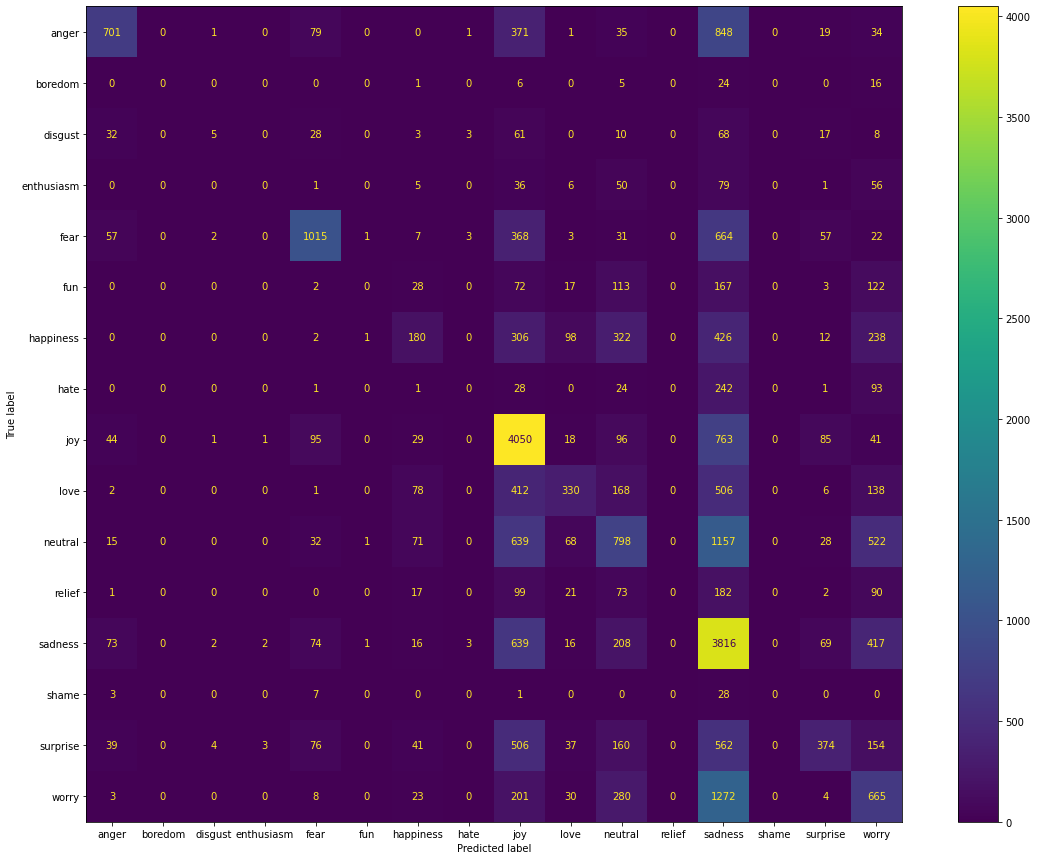

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
plot_confusion_matrix(nb_model, X_test, y_test, ax = ax)

In [ ]:
#model save 
import joblib

In [ ]:
modelfile = open('emotion_nb_model.pkl', 'wb')
joblib.dump(nb_model, modelfile)
modelfile.close()

In [ ]:
#logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_model.score(X_test, y_test)

0.521823472356935

In [ ]:
predict_emotion(text, lr_model)

Prediction emotion : love, Prediction score : 0.19796504453568992


{'anger': 0.0438480421910907,
 'boredom': 0.0014450370072614043,
 'disgust': 0.01598883009652938,
 'enthusiasm': 0.0061844053578931696,
 'fear': 0.05143723291776649,
 'fun': 0.008716128577786421,
 'happiness': 0.038833761378052216,
 'hate': 0.004427427351140097,
 'joy': 0.18555199216865792,
 'love': 0.19796504453568992,
 'neutral': 0.14616098756159104,
 'relief': 0.014876093407294823,
 'sadness': 0.13776053967462806,
 'shame': 0.0004367468762233127,
 'surprise': 0.08923871582924035,
 'worry': 0.05712901506915455}

In [ ]:
!pip install eli5

In [ ]:
#model interpertaion
import eli5

In [ ]:
eli5.show_weights(lr_model, top = 20)